# Time Series Analysis

-  Introduction to Time Series & Creating Time Series object

#1- Importing Key modules

In [2]:
# support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function

# I am an engineer. I care only about error not warning. So, let's be maverick and ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import scipy.stats
import pylab
import matplotlib.pyplot as plt

# 2- Loading and Exploring data

In [4]:
df = pd.read_csv("Index2018.csv")
df.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [5]:
df.shape

(6269, 5)

In [6]:
# checking missing values
df.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [7]:
df.dtypes

date       object
spx       float64
dax       float64
ftse      float64
nikkei    float64
dtype: object

Date object should be converted to datetime object

### Plotting

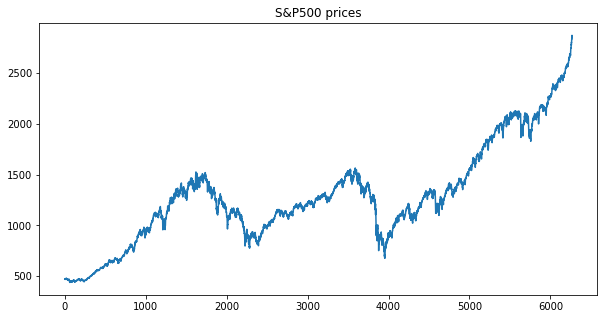

In [8]:
df.spx.plot(figsize=(10,5), title = "S&P500 prices")
plt.show()

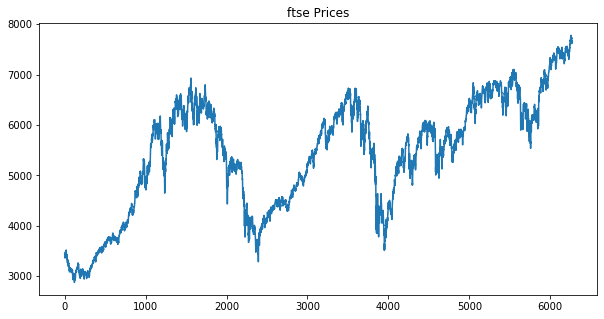

In [9]:
df.ftse.plot(figsize= (10,5), title = "ftse Prices")
plt.show()

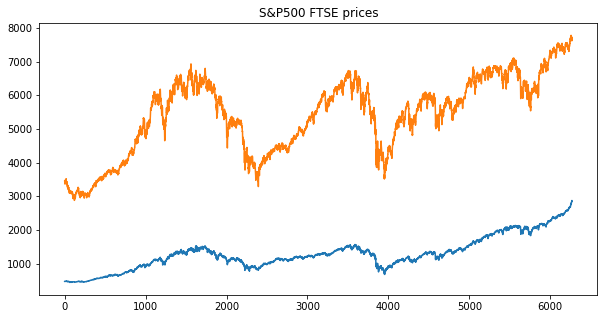

In [10]:
# Comparison of both prices are in same plot
df.spx.plot(figsize=(10,5), title = "S&P500 prices")
df.ftse.plot(figsize= (10,5), title = "ftse Prices")
plt.title("S&P500 FTSE prices")
plt.show()

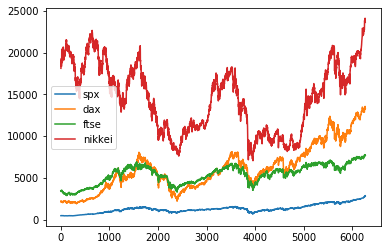

In [11]:
# comparision of all prices

df.plot()
plt.show()

### QQ plot (Quantile-Quantile plot)
It iw used to determine whether a dataset is distributed a certain way. usually showcases how the data fit a normal distribution.

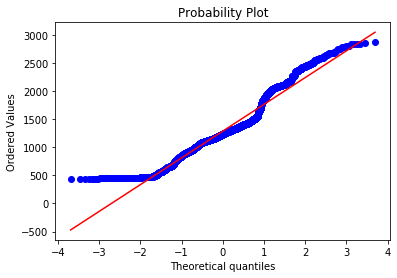

In [12]:
scipy.stats.probplot(df.spx, plot = pylab)
pylab.show()

y axis represents the prices, x axis represents the how many standard deviation away from the mean these values are. redline normally distributed line

# 3- Dealing with Time series data

### Length of the time period

In [13]:
df.date.describe() #top generates a arbitrary values, we need to fix it

count           6269
unique          6269
top       19/04/2012
freq               1
Name: date, dtype: object

At this point , date is considered as an object and hence it randomly shows top value. We need to know more information about our date feature

### Conversion to datetime

In [14]:
df.date = pd.to_datetime(df.date, dayfirst=True)

In [15]:
df.dtypes

date      datetime64[ns]
spx              float64
dax              float64
ftse             float64
nikkei           float64
dtype: object

In [16]:
df.date.describe()

count                    6269
unique                   6269
top       1999-08-23 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

This is much better.

### set the Index

- Each value should correspond to time period
- examine chunk of data between two dates
- separate data before and after 15th Sep, 2008.
- associate time periods as indices 

In [17]:
df.set_index("date", inplace = True)

In [18]:
df.head(2)

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44


### Setting the desired frequency




In [19]:
# for monthly basis
df.asfreq('m').head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-31,481.61,2192.60,3491.83,20229.12
1994-02-28,467.14,2103.24,3328.10,19997.20
1994-03-31,445.77,2142.88,3086.40,19111.92
1994-04-30,NaN,NaN,NaN,NaN
1994-05-31,456.50,2137.34,2970.50,20973.59


In [20]:
# for annual basis
df.asfreq('a').head()

,spx,dax,ftse,nikkei
date,,,,
1994-12-31,NaN,NaN,NaN,NaN
1995-12-31,NaN,NaN,NaN,NaN
1996-12-31,740.74,2880.07,4118.50,19361.35
1997-12-31,970.43,4224.30,5135.50,15258.74
1998-12-31,1229.23,5006.57,5882.58,13842.17


In [22]:
# for week basis
#df.asfreq('w').head()

- Use day for our analysis

In [24]:
df = df.asfreq('d')#we can set the frequency by asfreq..there 'd' means we are observing the value in daily basis
df.shape

(8789, 4)

In [25]:
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25


We can some missing values now . There is a catch. These two days are Sat and Sun and therefore, it is obvious that there is no activitiy in those two days.

In [26]:
df = df.asfreq("b") #'b' means business days..means business stock exchange are off in weekend..thus if we look daily basis we are getting missing values in weekend like sat $ sunday
df.head()#using 'b' tells python to expect missing values when date falls on a sat & sunday

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [27]:
df.shape

(6277, 4)

### Handling Missing values

With filtered data

In [35]:
df.isnull().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [40]:
# check exact values where we have missing values
col_mask=df.isnull().any(axis=0)
row_mask=df.isnull().any(axis=1)
df.loc[row_mask,col_mask]

,spx,dax,ftse,nikkei
date,,,,
2008-01-01,NaN,NaN,NaN,NaN
2009-01-01,NaN,NaN,NaN,NaN
2010-01-01,NaN,NaN,NaN,NaN
2013-01-01,NaN,NaN,NaN,NaN
2014-01-01,NaN,NaN,NaN,NaN
2015-01-01,NaN,NaN,NaN,NaN
2016-01-01,NaN,NaN,NaN,NaN
2018-01-01,NaN,NaN,NaN,NaN


All values that on 1st date of year are missing. They are consistent with all features

In [41]:
df.spx = df.spx.fillna(method = "ffill") #fill the missing values of spx with the front filling method

In [42]:
df.isnull().sum()

spx       0
dax       8
ftse      8
nikkei    8
dtype: int64

In [43]:
df.ftse = df.ftse.fillna(method = "bfill") #fill the missing values of ftse with the back filling method

In [44]:
df.dax = df.dax.fillna(value = df.dax.mean()) # using mean

In [45]:
df.nikkei = df.nikkei.fillna(method = "ffill")

In [46]:
df.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

# 4- Feature Selection

Using most relevent features to make more sense of data.

In [28]:
df['market_value'] = df.spx # a column named market_value is added and identical as spx

In [29]:
df.head(2)

,spx,dax,ftse,nikkei,market_value
date,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,469.90
1994-01-10,475.27,2225.00,3440.58,18443.44,475.27


In [30]:
del df['spx'], df['dax'], df['ftse'], df['nikkei'] #delete column

In [31]:
df.head(2)

,market_value
date,
1994-01-07,469.90
1994-01-10,475.27


In [32]:
df.describe()

,market_value
count,6277.000000
mean,1288.642547
std,487.868210
min,438.920000
25%,992.715221
50%,1233.761241
75%,1460.250000
max,2872.867839


# For Model Buidling


PReprocessing data

### split the dataset

In [33]:
size = int(len(df)*.80)
df_train = df.iloc[:size]
df_test = df.iloc[size:]

In [34]:
print(df_train.shape)
print(df_test.shape)

(5021, 1)
(1256, 1)
